In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import MinMaxScaler
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
import time
from sklearn.metrics import accuracy_score
from datetime import datetime
plt.rcParams['figure.figsize'] = [16,10]

In [2]:
data = pd.read_csv("records.csv")

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 14 columns):
id                     2000 non-null int64
email                  2000 non-null object
name                   2000 non-null object
address                2000 non-null object
hometown               2000 non-null object
p_latitude             2000 non-null float64
p_longitude            2000 non-null float64
age                    2000 non-null int64
salary                 2000 non-null int64
gender                 2000 non-null object
relationship_status    2000 non-null object
education              2000 non-null object
employment_status      2000 non-null object
plan                   2000 non-null int64
dtypes: float64(2), int64(4), object(8)
memory usage: 218.8+ KB


In [4]:
train,test = train_test_split(data,test_size=0.25)

In [5]:
train.shape, test.shape

((1500, 14), (500, 14))

In [6]:
train_target = train.plan

In [7]:
train = train.drop(columns="plan")

In [8]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 747 to 764
Data columns (total 13 columns):
id                     1500 non-null int64
email                  1500 non-null object
name                   1500 non-null object
address                1500 non-null object
hometown               1500 non-null object
p_latitude             1500 non-null float64
p_longitude            1500 non-null float64
age                    1500 non-null int64
salary                 1500 non-null int64
gender                 1500 non-null object
relationship_status    1500 non-null object
education              1500 non-null object
employment_status      1500 non-null object
dtypes: float64(2), int64(3), object(8)
memory usage: 164.1+ KB


In [9]:
train_id = train.pop("id")

In [10]:
train_id.shape
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 747 to 764
Data columns (total 12 columns):
email                  1500 non-null object
name                   1500 non-null object
address                1500 non-null object
hometown               1500 non-null object
p_latitude             1500 non-null float64
p_longitude            1500 non-null float64
age                    1500 non-null int64
salary                 1500 non-null int64
gender                 1500 non-null object
relationship_status    1500 non-null object
education              1500 non-null object
employment_status      1500 non-null object
dtypes: float64(2), int64(2), object(8)
memory usage: 152.3+ KB


In [11]:
feature = ["age","salary","gender","relationship_status","education","employment_status"]

In [12]:
train_v1 = train[feature]

In [13]:
train_v1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 747 to 764
Data columns (total 6 columns):
age                    1500 non-null int64
salary                 1500 non-null int64
gender                 1500 non-null object
relationship_status    1500 non-null object
education              1500 non-null object
employment_status      1500 non-null object
dtypes: int64(2), object(4)
memory usage: 82.0+ KB


In [14]:
train_v1.shape,train_target.shape

((1500, 6), (1500,))

In [15]:
train_train,train_train_target,train_valid,train_valid_target = train_test_split(train_v1,train_target,test_size=0.2,random_state=13)

In [16]:
train_train.shape,train_train_target.shape,train_valid.shape,train_valid_target.shape

((1200, 6), (300, 6), (1200,), (300,))

In [17]:
test_target = test.pop("plan")

In [18]:
test.shape, test_target.shape

((500, 13), (500,))

In [19]:
categorical_variables = ["gender","relationship_status","education","employment_status"]

for variable in categorical_variables:
    dummies = pd.get_dummies(train_v1[variable],prefix=variable,prefix_sep='_')
    train_v1 = pd.concat([train_v1, dummies],axis=1)
    #train_v1.drop([variable,axis=1,inplace=True])

In [20]:
train_v1 = train_v1.drop(columns=categorical_variables)

In [21]:
train_v1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1500 entries, 747 to 764
Data columns (total 13 columns):
age                             1500 non-null int64
salary                          1500 non-null int64
gender_female                   1500 non-null uint8
gender_male                     1500 non-null uint8
relationship_status_married     1500 non-null uint8
relationship_status_single      1500 non-null uint8
relationship_status_widow       1500 non-null uint8
relationship_status_widower     1500 non-null uint8
education_g                     1500 non-null uint8
education_ng                    1500 non-null uint8
education_pg                    1500 non-null uint8
employment_status_employed      1500 non-null uint8
employment_status_unemployed    1500 non-null uint8
dtypes: int64(2), uint8(11)
memory usage: 91.3 KB


In [22]:
test_v1 = test[feature]
test_v1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 626 to 1651
Data columns (total 6 columns):
age                    500 non-null int64
salary                 500 non-null int64
gender                 500 non-null object
relationship_status    500 non-null object
education              500 non-null object
employment_status      500 non-null object
dtypes: int64(2), object(4)
memory usage: 27.3+ KB


In [23]:
categorical_variables = ["gender","relationship_status","education","employment_status"]

for variable in categorical_variables:
    dummies = pd.get_dummies(test_v1[variable],prefix=variable,prefix_sep='_')
    test_v1 = pd.concat([test_v1, dummies],axis=1)
    #test.drop([variable,axis=1,inplace=True])

In [24]:
test_v1 = test_v1.drop(columns=categorical_variables)

In [25]:
test_v1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 500 entries, 626 to 1651
Data columns (total 13 columns):
age                             500 non-null int64
salary                          500 non-null int64
gender_female                   500 non-null uint8
gender_male                     500 non-null uint8
relationship_status_married     500 non-null uint8
relationship_status_single      500 non-null uint8
relationship_status_widow       500 non-null uint8
relationship_status_widower     500 non-null uint8
education_g                     500 non-null uint8
education_ng                    500 non-null uint8
education_pg                    500 non-null uint8
employment_status_employed      500 non-null uint8
employment_status_unemployed    500 non-null uint8
dtypes: int64(2), uint8(11)
memory usage: 17.1 KB


In [26]:
train_train,train_valid,train_train_target,train_valid_target = train_test_split(train_v1,train_target,test_size=0.2,random_state=13)

In [27]:
train_train.shape, train_train_target.shape, train_valid.shape, train_valid_target.shape

((1200, 13), (1200,), (300, 13), (300,))

In [28]:
train_train.salary = train_train.salary/100
train_valid.salary = train_valid.salary/100

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\generic.py:3643: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


In [29]:
dtrain = xgb.DMatrix(train_train, label = train_train_target)
dvalid = xgb.DMatrix(train_valid, label = train_valid_target)
dtest = xgb.DMatrix(test_v1)
watchlist = [(dtrain,'train'),(dvalid,'valid')]

In [34]:
md = [6]
lr = [0.1,0.3]
mcw = [20,25,30]
for m in md:
    for l in lr:
        for n in mcw:
            t0 = datetime.now()
            xgb_pars = {'min_child_weight':n, 'eta':l, 'colsample_bytree':0.9, 'max_depth':m, 'subsample': 0.9, 'lambda':1, 'nthread': -1, 'booster': 'gbtree', 'silent':1, 'eval_metric': 'merror', 'objective': 'multi:softmax','n_jobs':1,'num_class':5}
            model =  xgb.train(xgb_pars, dtrain, 250, watchlist,  maximize=False, verbose_eval=1)#early_stopping_rounds=10,

[0]	train-merror:0.630833	valid-merror:0.716667
[1]	train-merror:0.600833	valid-merror:0.686667
[2]	train-merror:0.575833	valid-merror:0.676667
[3]	train-merror:0.566667	valid-merror:0.666667
[4]	train-merror:0.559167	valid-merror:0.673333
[5]	train-merror:0.555833	valid-merror:0.68
[6]	train-merror:0.556667	valid-merror:0.68
[7]	train-merror:0.5475	valid-merror:0.68
[8]	train-merror:0.546667	valid-merror:0.676667
[9]	train-merror:0.53	valid-merror:0.68
[10]	train-merror:0.53	valid-merror:0.68
[11]	train-merror:0.5275	valid-merror:0.673333
[12]	train-merror:0.525	valid-merror:0.686667
[13]	train-merror:0.5175	valid-merror:0.693333
[14]	train-merror:0.516667	valid-merror:0.686667
[15]	train-merror:0.513333	valid-merror:0.68
[16]	train-merror:0.5175	valid-merror:0.666667
[17]	train-merror:0.515	valid-merror:0.663333
[18]	train-merror:0.514167	valid-merror:0.666667
[19]	train-merror:0.504167	valid-merror:0.67
[20]	train-merror:0.505833	valid-merror:0.66
[21]	train-merror:0.505833	valid-me

[174]	train-merror:0.324167	valid-merror:0.683333
[175]	train-merror:0.3225	valid-merror:0.676667
[176]	train-merror:0.321667	valid-merror:0.686667
[177]	train-merror:0.323333	valid-merror:0.686667
[178]	train-merror:0.3225	valid-merror:0.683333
[179]	train-merror:0.318333	valid-merror:0.686667
[180]	train-merror:0.319167	valid-merror:0.686667
[181]	train-merror:0.321667	valid-merror:0.69
[182]	train-merror:0.319167	valid-merror:0.69
[183]	train-merror:0.318333	valid-merror:0.686667
[184]	train-merror:0.320833	valid-merror:0.683333
[185]	train-merror:0.320833	valid-merror:0.683333
[186]	train-merror:0.319167	valid-merror:0.683333
[187]	train-merror:0.32	valid-merror:0.686667
[188]	train-merror:0.32	valid-merror:0.686667
[189]	train-merror:0.320833	valid-merror:0.683333
[190]	train-merror:0.318333	valid-merror:0.683333
[191]	train-merror:0.315	valid-merror:0.68
[192]	train-merror:0.313333	valid-merror:0.686667
[193]	train-merror:0.313333	valid-merror:0.69
[194]	train-merror:0.311667	val

[98]	train-merror:0.415833	valid-merror:0.69
[99]	train-merror:0.411667	valid-merror:0.69
[100]	train-merror:0.42	valid-merror:0.676667
[101]	train-merror:0.415	valid-merror:0.68
[102]	train-merror:0.413333	valid-merror:0.683333
[103]	train-merror:0.410833	valid-merror:0.693333
[104]	train-merror:0.406667	valid-merror:0.69
[105]	train-merror:0.405833	valid-merror:0.683333
[106]	train-merror:0.400833	valid-merror:0.686667
[107]	train-merror:0.404167	valid-merror:0.686667
[108]	train-merror:0.405	valid-merror:0.7
[109]	train-merror:0.399167	valid-merror:0.69
[110]	train-merror:0.401667	valid-merror:0.69
[111]	train-merror:0.4025	valid-merror:0.683333
[112]	train-merror:0.395833	valid-merror:0.683333
[113]	train-merror:0.396667	valid-merror:0.686667
[114]	train-merror:0.395833	valid-merror:0.683333
[115]	train-merror:0.395	valid-merror:0.683333
[116]	train-merror:0.395833	valid-merror:0.68
[117]	train-merror:0.398333	valid-merror:0.673333
[118]	train-merror:0.390833	valid-merror:0.676667


[20]	train-merror:0.54	valid-merror:0.67
[21]	train-merror:0.539167	valid-merror:0.66
[22]	train-merror:0.536667	valid-merror:0.67
[23]	train-merror:0.533333	valid-merror:0.676667
[24]	train-merror:0.535	valid-merror:0.683333
[25]	train-merror:0.536667	valid-merror:0.68
[26]	train-merror:0.535833	valid-merror:0.676667
[27]	train-merror:0.526667	valid-merror:0.683333
[28]	train-merror:0.5275	valid-merror:0.683333
[29]	train-merror:0.5275	valid-merror:0.68
[30]	train-merror:0.524167	valid-merror:0.68
[31]	train-merror:0.519167	valid-merror:0.69
[32]	train-merror:0.525	valid-merror:0.683333
[33]	train-merror:0.5225	valid-merror:0.68
[34]	train-merror:0.52	valid-merror:0.673333
[35]	train-merror:0.520833	valid-merror:0.676667
[36]	train-merror:0.52	valid-merror:0.686667
[37]	train-merror:0.518333	valid-merror:0.673333
[38]	train-merror:0.510833	valid-merror:0.67
[39]	train-merror:0.51	valid-merror:0.673333
[40]	train-merror:0.515	valid-merror:0.676667
[41]	train-merror:0.510833	valid-merro

[195]	train-merror:0.390833	valid-merror:0.676667
[196]	train-merror:0.390833	valid-merror:0.68
[197]	train-merror:0.388333	valid-merror:0.68
[198]	train-merror:0.385	valid-merror:0.676667
[199]	train-merror:0.385833	valid-merror:0.683333
[200]	train-merror:0.381667	valid-merror:0.683333
[201]	train-merror:0.383333	valid-merror:0.68
[202]	train-merror:0.384167	valid-merror:0.68
[203]	train-merror:0.379167	valid-merror:0.676667
[204]	train-merror:0.378333	valid-merror:0.686667
[205]	train-merror:0.380833	valid-merror:0.69
[206]	train-merror:0.375833	valid-merror:0.69
[207]	train-merror:0.375	valid-merror:0.683333
[208]	train-merror:0.375	valid-merror:0.683333
[209]	train-merror:0.3775	valid-merror:0.676667
[210]	train-merror:0.376667	valid-merror:0.676667
[211]	train-merror:0.375	valid-merror:0.683333
[212]	train-merror:0.378333	valid-merror:0.686667
[213]	train-merror:0.373333	valid-merror:0.683333
[214]	train-merror:0.366667	valid-merror:0.683333
[215]	train-merror:0.366667	valid-merr

[119]	train-merror:0.244167	valid-merror:0.7
[120]	train-merror:0.241667	valid-merror:0.7
[121]	train-merror:0.243333	valid-merror:0.7
[122]	train-merror:0.246667	valid-merror:0.706667
[123]	train-merror:0.241667	valid-merror:0.703333
[124]	train-merror:0.238333	valid-merror:0.706667
[125]	train-merror:0.2325	valid-merror:0.706667
[126]	train-merror:0.238333	valid-merror:0.706667
[127]	train-merror:0.235	valid-merror:0.716667
[128]	train-merror:0.235	valid-merror:0.716667
[129]	train-merror:0.233333	valid-merror:0.713333
[130]	train-merror:0.231667	valid-merror:0.703333
[131]	train-merror:0.23	valid-merror:0.716667
[132]	train-merror:0.226667	valid-merror:0.72
[133]	train-merror:0.226667	valid-merror:0.716667
[134]	train-merror:0.2275	valid-merror:0.716667
[135]	train-merror:0.223333	valid-merror:0.723333
[136]	train-merror:0.225	valid-merror:0.723333
[137]	train-merror:0.225	valid-merror:0.72
[138]	train-merror:0.224167	valid-merror:0.72
[139]	train-merror:0.223333	valid-merror:0.73
[

[43]	train-merror:0.388333	valid-merror:0.7
[44]	train-merror:0.395	valid-merror:0.686667
[45]	train-merror:0.385	valid-merror:0.69
[46]	train-merror:0.379167	valid-merror:0.693333
[47]	train-merror:0.369167	valid-merror:0.69
[48]	train-merror:0.379167	valid-merror:0.696667
[49]	train-merror:0.3725	valid-merror:0.676667
[50]	train-merror:0.3725	valid-merror:0.686667
[51]	train-merror:0.3625	valid-merror:0.683333
[52]	train-merror:0.369167	valid-merror:0.683333
[53]	train-merror:0.370833	valid-merror:0.69
[54]	train-merror:0.371667	valid-merror:0.696667
[55]	train-merror:0.37	valid-merror:0.68
[56]	train-merror:0.3625	valid-merror:0.666667
[57]	train-merror:0.358333	valid-merror:0.676667
[58]	train-merror:0.35	valid-merror:0.683333
[59]	train-merror:0.353333	valid-merror:0.666667
[60]	train-merror:0.353333	valid-merror:0.676667
[61]	train-merror:0.355	valid-merror:0.673333
[62]	train-merror:0.36	valid-merror:0.68
[63]	train-merror:0.35	valid-merror:0.673333
[64]	train-merror:0.3525	vali

[217]	train-merror:0.200833	valid-merror:0.7
[218]	train-merror:0.199167	valid-merror:0.696667
[219]	train-merror:0.198333	valid-merror:0.706667
[220]	train-merror:0.198333	valid-merror:0.703333
[221]	train-merror:0.198333	valid-merror:0.696667
[222]	train-merror:0.195833	valid-merror:0.683333
[223]	train-merror:0.1975	valid-merror:0.683333
[224]	train-merror:0.193333	valid-merror:0.686667
[225]	train-merror:0.194167	valid-merror:0.686667
[226]	train-merror:0.194167	valid-merror:0.693333
[227]	train-merror:0.199167	valid-merror:0.693333
[228]	train-merror:0.194167	valid-merror:0.696667
[229]	train-merror:0.196667	valid-merror:0.69
[230]	train-merror:0.191667	valid-merror:0.693333
[231]	train-merror:0.190833	valid-merror:0.693333
[232]	train-merror:0.1925	valid-merror:0.69
[233]	train-merror:0.190833	valid-merror:0.69
[234]	train-merror:0.190833	valid-merror:0.693333
[235]	train-merror:0.1875	valid-merror:0.69
[236]	train-merror:0.183333	valid-merror:0.693333
[237]	train-merror:0.1875	v

[142]	train-merror:0.301667	valid-merror:0.703333
[143]	train-merror:0.300833	valid-merror:0.706667
[144]	train-merror:0.2975	valid-merror:0.7
[145]	train-merror:0.294167	valid-merror:0.71
[146]	train-merror:0.295	valid-merror:0.706667
[147]	train-merror:0.29	valid-merror:0.713333
[148]	train-merror:0.296667	valid-merror:0.716667
[149]	train-merror:0.299167	valid-merror:0.71
[150]	train-merror:0.291667	valid-merror:0.713333
[151]	train-merror:0.295833	valid-merror:0.716667
[152]	train-merror:0.2925	valid-merror:0.71
[153]	train-merror:0.2925	valid-merror:0.703333
[154]	train-merror:0.293333	valid-merror:0.706667
[155]	train-merror:0.289167	valid-merror:0.71
[156]	train-merror:0.288333	valid-merror:0.716667
[157]	train-merror:0.286667	valid-merror:0.713333
[158]	train-merror:0.286667	valid-merror:0.706667
[159]	train-merror:0.285	valid-merror:0.71
[160]	train-merror:0.2875	valid-merror:0.706667
[161]	train-merror:0.285	valid-merror:0.71
[162]	train-merror:0.288333	valid-merror:0.706667


In [35]:
fin_model=xgb.XGBClassifier()

In [37]:
fin_model.fit(train_train,train_train_target)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

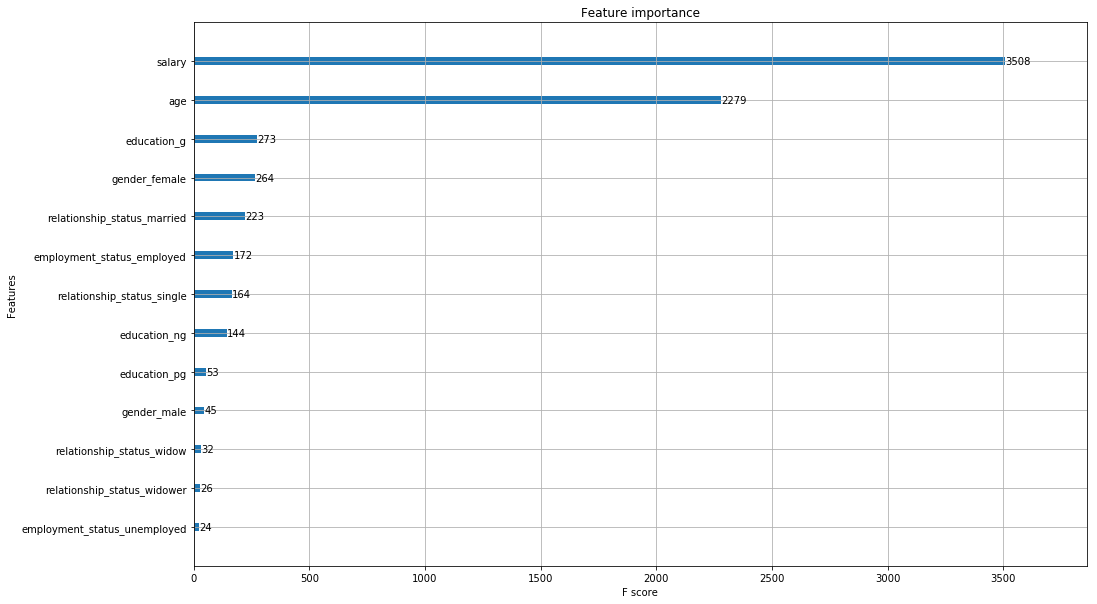

In [40]:
xgb.plot_importance(model)

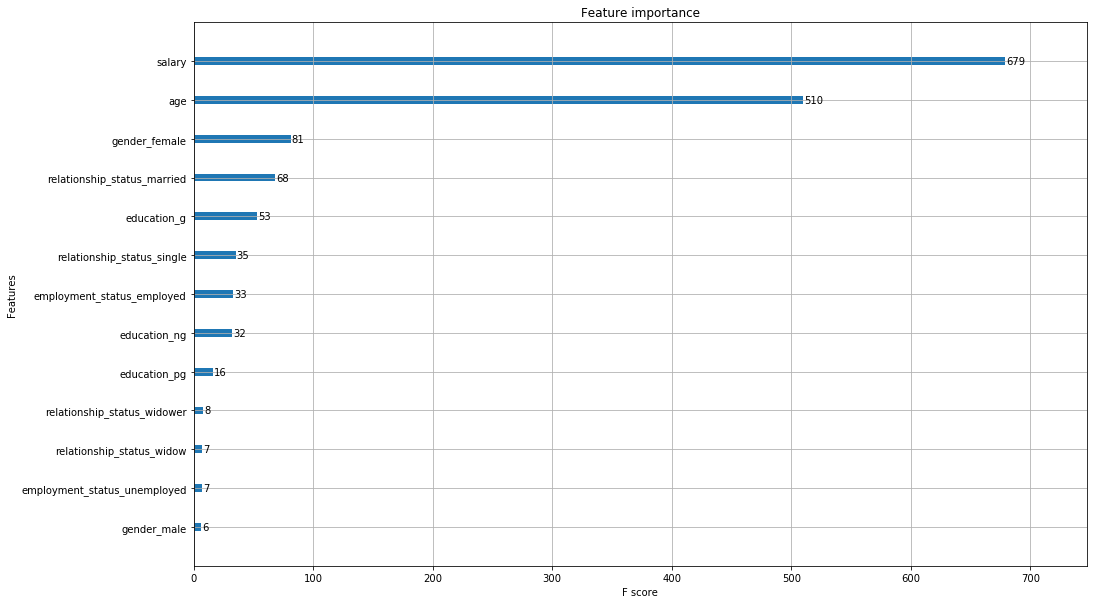

In [32]:
xgb.plot_importance(model)

In [106]:
xgb_pars = {'min_child_weight':30, 'eta':0.3, 'colsample_bytree':0.9, 'max_depth':6, 'subsample': 0.9, 'lambda':1, 'nthread': -1, 'booster': 'gbtree', 'silent':1, 'eval_metric': 'merror', 'objective': 'multi:softmax','n_jobs':1,'num_class':5}
model =  xgb.train(xgb_pars, dtrain, 500, watchlist,  maximize=False, verbose_eval=1)#early_stopping_rounds=10,

[0]	train-merror:0.653333	valid-merror:0.726667
[1]	train-merror:0.616667	valid-merror:0.753333
[2]	train-merror:0.605833	valid-merror:0.71
[3]	train-merror:0.598333	valid-merror:0.716667
[4]	train-merror:0.5825	valid-merror:0.696667
[5]	train-merror:0.581667	valid-merror:0.716667
[6]	train-merror:0.5775	valid-merror:0.723333
[7]	train-merror:0.565	valid-merror:0.743333
[8]	train-merror:0.560833	valid-merror:0.743333
[9]	train-merror:0.550833	valid-merror:0.74
[10]	train-merror:0.539167	valid-merror:0.71
[11]	train-merror:0.541667	valid-merror:0.723333
[12]	train-merror:0.545	valid-merror:0.733333
[13]	train-merror:0.534167	valid-merror:0.726667
[14]	train-merror:0.5425	valid-merror:0.71
[15]	train-merror:0.54	valid-merror:0.716667
[16]	train-merror:0.531667	valid-merror:0.72
[17]	train-merror:0.529167	valid-merror:0.706667
[18]	train-merror:0.5325	valid-merror:0.71
[19]	train-merror:0.520833	valid-merror:0.72
[20]	train-merror:0.5175	valid-merror:0.713333
[21]	train-merror:0.506667	va

[175]	train-merror:0.3025	valid-merror:0.693333
[176]	train-merror:0.298333	valid-merror:0.696667
[177]	train-merror:0.2925	valid-merror:0.686667
[178]	train-merror:0.293333	valid-merror:0.676667
[179]	train-merror:0.289167	valid-merror:0.673333
[180]	train-merror:0.293333	valid-merror:0.68
[181]	train-merror:0.285833	valid-merror:0.686667
[182]	train-merror:0.293333	valid-merror:0.69
[183]	train-merror:0.2925	valid-merror:0.696667
[184]	train-merror:0.284167	valid-merror:0.693333
[185]	train-merror:0.288333	valid-merror:0.69
[186]	train-merror:0.2875	valid-merror:0.686667
[187]	train-merror:0.286667	valid-merror:0.683333
[188]	train-merror:0.290833	valid-merror:0.693333
[189]	train-merror:0.288333	valid-merror:0.683333
[190]	train-merror:0.288333	valid-merror:0.69
[191]	train-merror:0.281667	valid-merror:0.696667
[192]	train-merror:0.28	valid-merror:0.686667
[193]	train-merror:0.2825	valid-merror:0.693333
[194]	train-merror:0.281667	valid-merror:0.69
[195]	train-merror:0.276667	valid-

[348]	train-merror:0.205	valid-merror:0.666667
[349]	train-merror:0.198333	valid-merror:0.666667
[350]	train-merror:0.199167	valid-merror:0.666667
[351]	train-merror:0.200833	valid-merror:0.67
[352]	train-merror:0.201667	valid-merror:0.666667
[353]	train-merror:0.201667	valid-merror:0.67
[354]	train-merror:0.203333	valid-merror:0.666667
[355]	train-merror:0.203333	valid-merror:0.666667
[356]	train-merror:0.2	valid-merror:0.673333
[357]	train-merror:0.203333	valid-merror:0.67
[358]	train-merror:0.2025	valid-merror:0.666667
[359]	train-merror:0.204167	valid-merror:0.66
[360]	train-merror:0.2025	valid-merror:0.66
[361]	train-merror:0.2025	valid-merror:0.656667
[362]	train-merror:0.203333	valid-merror:0.656667
[363]	train-merror:0.2	valid-merror:0.656667
[364]	train-merror:0.2	valid-merror:0.656667
[365]	train-merror:0.201667	valid-merror:0.66
[366]	train-merror:0.201667	valid-merror:0.656667
[367]	train-merror:0.199167	valid-merror:0.656667
[368]	train-merror:0.200833	valid-merror:0.65666

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
       colsample_bytree=1, gamma=0, learning_rate=0.1, max_delta_step=0,
       max_depth=3, min_child_weight=1, missing=None, n_estimators=100,
       n_jobs=1, nthread=None, objective='multi:softprob', random_state=0,
       reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
       silent=True, subsample=1)

In [ ]:
import pickle

In [114]:
pickle.dump(fin_model, open("model.dat","wb"),protocol=2)

In [108]:
loaded_model = pickle.load(open("model.dat","rb"))

In [109]:
y_pred = loaded_model.predict(test_v1)
result_var = y_pred[0]

In [110]:
from sklearn.metrics import accuracy_score

In [113]:
with open('model_result.txt', 'w') as f:
    f.write(result_var.astype(str))

In [41]:
from sklearn.ensemble import RandomForestClassifier

In [46]:
model = RandomForestClassifier(n_estimators =5000, oob_score=True, n_jobs=-1, random_state=100)
model.fit(train_train,train_train_target)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=5000, n_jobs=-1,
            oob_score=True, random_state=100, verbose=0, warm_start=False)

In [48]:
pred = model.predict(train_valid)
print("error is",accuracy_score(train_valid_target,pred))

error is 0.29
